### 슬롯 확률 맞추기 // 슬롯마다 확률이 모두 다르다.

In [4]:
import numpy as np

game = np.random.rand()
game

0.4179109871374064

In [5]:
# 확률을 알기 위한 방법
# 1. 게임을 많이 해보는 것, 
rewards = []
for i in range(1,1001):
    if np.random.rand() <=game:
        r = 1
    else:
        r = 0
    rewards.append(r)
    print(sum(rewards)/i)

0.0
0.0
0.3333333333333333
0.25
0.4
0.5
0.42857142857142855
0.375
0.3333333333333333
0.3
0.36363636363636365
0.4166666666666667
0.46153846153846156
0.42857142857142855
0.4
0.4375
0.47058823529411764
0.5
0.5263157894736842
0.5
0.47619047619047616
0.45454545454545453
0.4782608695652174
0.4583333333333333
0.44
0.4230769230769231
0.4444444444444444
0.42857142857142855
0.4482758620689655
0.4666666666666667
0.45161290322580644
0.46875
0.45454545454545453
0.4411764705882353
0.42857142857142855
0.4444444444444444
0.4594594594594595
0.4473684210526316
0.46153846153846156
0.475
0.4878048780487805
0.47619047619047616
0.4883720930232558
0.4772727272727273
0.4666666666666667
0.45652173913043476
0.46808510638297873
0.4791666666666667
0.4897959183673469
0.48
0.47058823529411764
0.46153846153846156
0.4528301886792453
0.4444444444444444
0.45454545454545453
0.44642857142857145
0.45614035087719296
0.46551724137931033
0.4745762711864407
0.48333333333333334
0.4918032786885246
0.4838709677419355
0.476190476

In [6]:
# 전 확률만 알면 계산하기 더 쉬울 것이다.
Q = 0
for n in range(1,1001):
    if np.random.rand() <= game:
        r = 1
    else:
        r = 0
    Q =(r - Q)/n + Q
Q

0.4289999999999997

#### 가정: 슬롯 10개(슬롯마다 확률이 모두 다르고 확률은 우린 모름.)

In [16]:
class Game:
    def __init__(self,arms = 10):
        self.rates = np.random.rand(arms)

    def play(self,arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [17]:
game = Game()


In [23]:
for n in range(10):
    print(game.play(0))

1
1
1
1
1
0
1
1
0
1


In [28]:
Qs = np.zeros(10)
Ns = np.zeros(10)

for n in range(1000):
    action = np.random.randint(0,10)
    #print(action)
    r = game.play(action)
    Ns[action] += 1
    Qs[action] +=(r - Qs[action] )/ Ns[action]

Qs

array([0.88659794, 0.77358491, 0.75294118, 0.48387097, 0.61818182,
       0.39784946, 0.38317757, 0.19791667, 0.37735849, 0.1588785 ])

In [29]:
game.rates

array([0.86354924, 0.8640928 , 0.77877742, 0.35243507, 0.6142786 ,
       0.4672832 , 0.43416154, 0.21190207, 0.38501894, 0.16378989])

In [31]:
# 가장 좋은 확률을 가지고 있는 슬롯 선택(현재 알고있는)
# 10% 확률로 다른 슬롯도 도전.
class Agent:
    def __init__(self,epsilon,action_size = 10 ):
        self.epsilon = epsilon # 무작위로 행동할 확률
        self.Qs = np.zeros(action_size)
        self.Ns = np.zeros(action_size)

    def update(self,action,reward):
        self.Ns[action] +=1
        self.Qs[action] +=(reward - self.Qs[action]) / self.Ns[action]

    def get_action(self):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)



In [37]:
steps = 1000 # 총 몇번 이길까?
epsilon = 0.1

game = Game()
agent = Agent(epsilon)

total_reward = 0
total_rewards = [] # 총 보
rates =[] # 현재까지의 평균 보상률(승률)을 저장하는 리스트입니다. 

for step in range(steps):
    action = agent.get_action()
    reward = game.play(action)
    # print(reward)

    agent.update(action,reward)

    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward/(step + 1))

    

In [38]:
total_reward

833

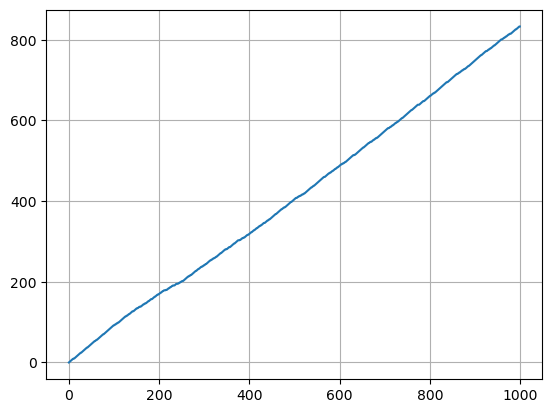

In [39]:
import matplotlib.pyplot as plt

plt.plot(total_rewards)
plt.grid()
plt.show()

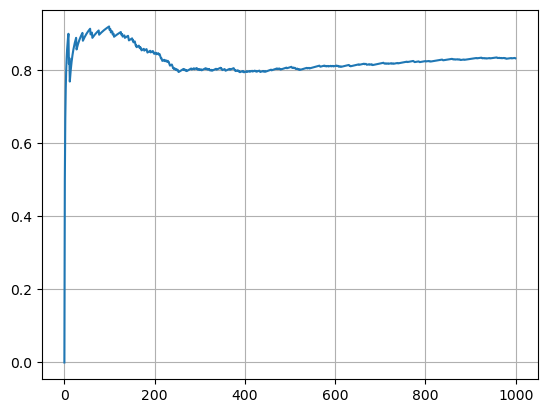

In [41]:
# 강화학습 : 컴퓨터를 어떤 환경에 넣어놓는 것
# 강화학습의 가장 기초가 되는 밴디트 알고리즘

plt.plot(rates)
plt.grid()
plt.show()

In [46]:
runs = 200
all_rates = np.zeros((runs,steps)) #  # 각 실행에서의 승률을 기록할 배열 초기화
# all_rates

for run in range(runs):
    game = Game()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()  # 에이전트가 행동을 선택
        reward = game.play(action)  # 선택된 행동에 따른 보상을 받음
        agent.update(action, reward)  # 선택한 행동에 대한 보상을 바탕으로 에이전트의 Q 값을 업데이트
        total_reward += reward  # 총 보상에 이번 게임의 보상을 더함
        rates.append(total_reward / (step + 1))  # 현재까지의 평균 보상률을 리스트에 저장

    all_rates[run] = rates
    

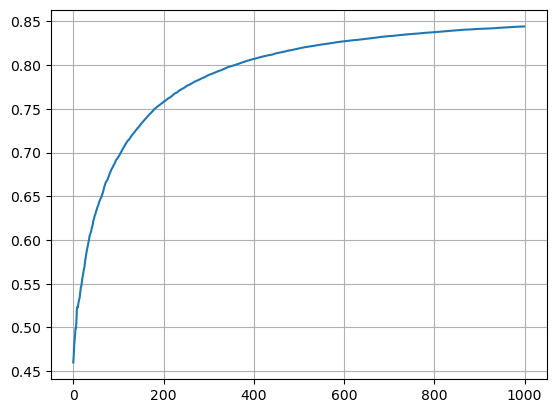

In [47]:
avg_rates = all_rates.mean(axis = 0)

plt.plot(avg_rates)
plt.grid()
plt.show()

### epsilon을 연습 0.01, 0.1, 0.3으로 설정한 후에 비교하기!

In [48]:
steps = 1000 # 총 몇번 이길까?
epsilon = 0.01

game = Game()
agent = Agent(epsilon)

total_reward = 0
total_rewards = []
rates =[]

for step in range(steps):
    action = agent.get_action()
    reward = game.play(action)
    # print(reward)

    agent.update(action,reward)

    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward/(step + 1))

    

In [49]:
total_reward

931

In [50]:
steps = 1000 # 총 몇번 이길까?
epsilon = 0.3

game = Game()
agent = Agent(epsilon)

total_reward = 0
total_rewards = []
rates =[]

for step in range(steps):
    action = agent.get_action()
    reward = game.play(action)
    # print(reward)

    agent.update(action,reward)

    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward/(step + 1))

    

In [51]:
total_reward

659

In [52]:
steps = 1000 # 총 몇번 이길까?
epsilon = 0.1

game = Game()
agent = Agent(epsilon)

total_reward = 0
total_rewards = []
rates =[]

for step in range(steps):
    action = agent.get_action()
    reward = game.play(action)
    # print(reward)

    agent.update(action,reward)

    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward/(step + 1))

    

In [53]:
total_reward

948

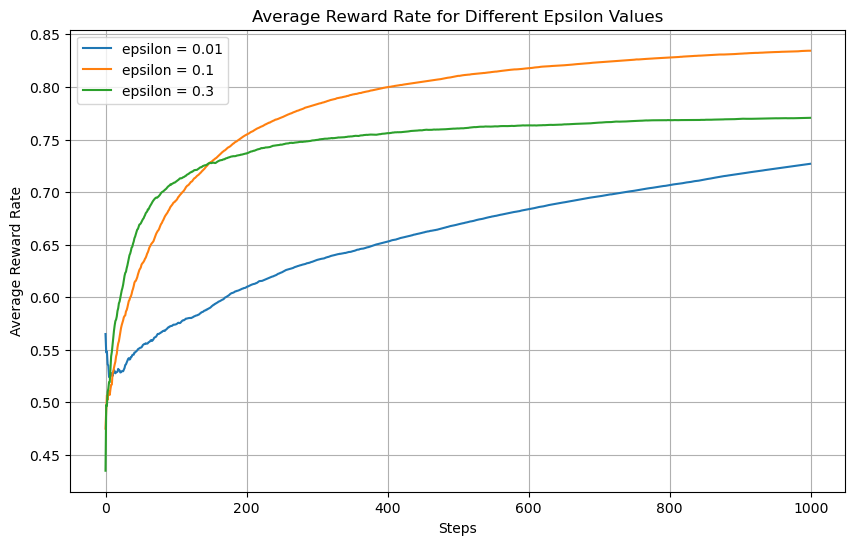

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Game 클래스와 Agent 클래스는 이전에 정의된 대로 사용

def run_experiment(epsilon, steps=1000, runs=200):
    all_rates = np.zeros((runs, steps))  # 각 실행에서의 승률을 기록할 배열 초기화

    for run in range(runs):
        game = Game()
        agent = Agent(epsilon)
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()  # 에이전트가 행동을 선택
            reward = game.play(action)  # 선택된 행동에 따른 보상을 받음
            agent.update(action, reward)  # 선택한 행동에 대한 보상을 바탕으로 에이전트의 Q 값을 업데이트
            total_reward += reward  # 총 보상에 이번 게임의 보상을 더함
            rates.append(total_reward / (step + 1))  # 현재까지의 평균 보상률을 리스트에 저장

        all_rates[run] = rates  # 각 실행의 승률을 기록
    
    avg_rates = all_rates.mean(axis=0)  # 200번 실행의 평균 보상률을 계산
    return avg_rates

# 여러 epsilon 값에 대해 실험하고 결과를 시각화
epsilons = [0.01, 0.1, 0.3]
steps = 1000
runs = 200

# 각 epsilon 값에 대해 결과 계산
avg_rates_dict = {}
for epsilon in epsilons:
    avg_rates_dict[epsilon] = run_experiment(epsilon, steps, runs)

# 시각화
plt.figure(figsize=(10, 6))
for epsilon, avg_rates in avg_rates_dict.items():
    plt.plot(avg_rates, label=f'epsilon = {epsilon}')
    
plt.title("Average Reward Rate for Different Epsilon Values")
plt.xlabel("Steps")
plt.ylabel("Average Reward Rate")
plt.legend()
plt.grid()
plt.show()


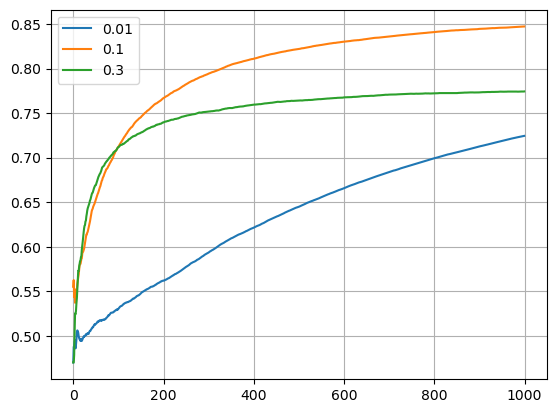

In [55]:
#### 강사님 풀이

# epsilon을 0.01, 0.1, 0.3 으로 설정하신후에 비교하기!
for e in [0.01, 0.1, 0.3]:
    runs = 200
    all_rates = np.zeros((runs, steps))
    
    for run in range(runs):
        game = Game()
        agent = Agent(e)
        total_reward = 0
        rates = []
        for step in range(steps):
            action = agent.get_action()
            reward = game.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))
        all_rates[run] = rates

    avg_rates = all_rates.mean(axis = 0)

    plt.plot(avg_rates, label = str(e))

plt.grid()
plt.legend()
plt.show()
    

* 매번 슬롯들의 확률을 조금씩 변형한다면?

In [56]:
class Game2:
    def __init__(self,arms = 10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self,arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) # 노이즈 추가
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [57]:
# 가장 좋은 확률을 가지고 있는 슬롯 선택(현재 알고있는)
# 10% 확률로 다른 슬롯도 도전.
class Agent2:
    def __init__(self,epsilon,alpha,action_size = 10 ):
        self.epsilon = epsilon # 무작위로 행동할 확률
        self.Qs = np.zeros(action_size)
        self.alpha = alpha

    def update(self,action,reward):
        self.Qs[action] +=(reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)



In [58]:
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
types = ['sample average', "alpha const update"]
results = {}

for agent_type in types:
    all_rates = np.zeros((runs, steps))
    for run in range(runs):
        if agent_type == "sample average":
            agent = Agent(epsilon)
        else:
            agent = Agent2(epsilon, alpha)

        game = Game2()
        total_reward = 0
        rates = []
    
        for step in range(steps):
            action = agent.get_action()
            reward = game.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.mean(all_rates, axis = 0)
    results[agent_type] = avg_rates

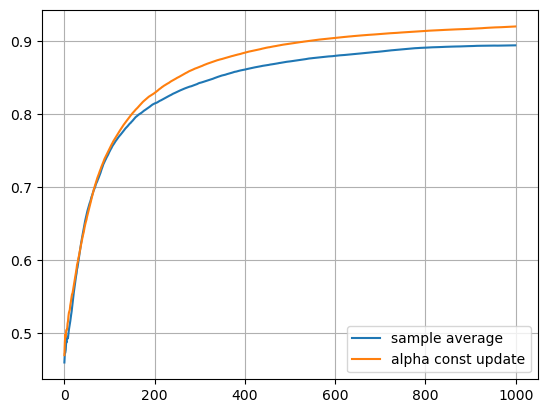

In [59]:
for key, avg_rates in results.items():
    plt.plot(avg_rates, label = key)

plt.grid()
plt.legend()
plt.show()

### 밴디트 알고리즘을 사용해서 상승장 종목 찾기

In [64]:
import os
import pandas as pd
import FinanceDataReader as fdr
total_reward = 0
alpha = 0.8

rates = []

# 하루에 5% 이상 오르면 보상
kospi = fdr.StockListing('KOSPI')
kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,57500,2,-1600,-2.71,58200,58500,57500,15150567,877111437200,343262496625000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,200500,1,4500,2.30,193500,202000,190000,4646809,915306400150,145964474182500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,410000,1,7000,1.74,411000,419000,407500,303773,125276052000,95940000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1046000,2,-13000,-1.23,1063000,1066000,1021000,68525,71386083000,74448004000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,235000,2,-6000,-2.49,241000,241000,234000,390265,92270063500,49212804885000,209416191,STK


In [66]:
from tqdm import tqdm

alpha = 0.8 # Q 값 업데이트에 사용할 학습률(보상 반영 정도).
rates = [] # 보상률(성공적인 거래 비율)을 저장할 리스트.
count = 0 # 성공적인 거래 횟수.
total_count = 0
box = []
for i in tqdm(range(len(kospi))):
    a = kospi.iloc[i]
    code = a['Code']
    name = a['Name']
    df = fdr.DataReader(code)
    Q = 0

    # 이 중첩된 반복문은 해당 종목의 Close 가격을 기준으로, 
    # 다음 날 주가가 5% 이상 상승했는지를 체크하여 보상을 계산합니다.
    for j in range(len(df) - 1):
        if df.iloc[j]['Close'] * 1.05 < df.iloc[j+1]['Close']:
            reward = 1
        else:
            reward = 0


        # Q 값이 0.9를 넘는 경우에만, 성공적인 거래 비율을 계산합니다.
        #reward == 1이면 성공적인 거래로 간주하고, count가 증가합니다.
        #total_count는 거래 횟수를 누적하여, count / total_count로 현재까지의 성공적인 거래 비율을 rates 리스트에 저장합니다.
        if Q > 0.9:
            total_count += 1
            if reward == 1:
                count += 1
            rates.append(count / total_count)

        # 이 식은 Q-learning 알고리즘의 업데이트 규칙입니다. reward - Q는 새로운 보상과 기존 Q 값의 차이를 의미하며, 이를 alpha로 조정하여 Q 값을 업데이트합니다. 
        # 이 과정에서 최근의 보상을 Q 값에 점진적으로 반영하게 됩니다.
        Q = Q + (reward - Q) * alpha

    box.append([name, Q])

100%|████████████████████████████████████████████████████████████| 958/958 [24:55<00:00,  1.56s/it]


In [67]:
df=pd.DataFrame(box,columns =['종목','Q'])

df = df.sort_values('Q',ascending = False)
df[df['Q']>0.9]


,종목,Q
356,YG PLUS,0.9984
156,더존비즈온,0.9600


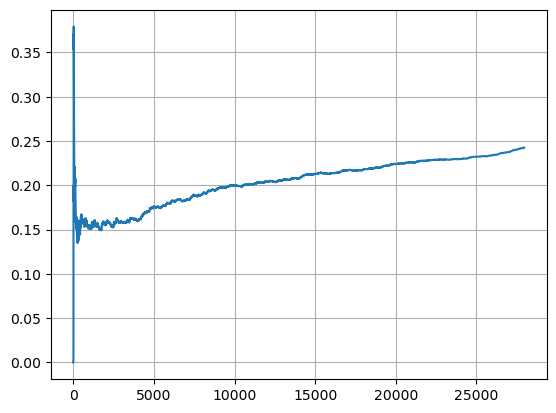

In [68]:
plt.plot(rates)
plt.grid()
plt.show()